# Practice question

In [1]:
# you can write to stdout for debugging purposes, e.g.
# print("this is a debug message")

def solution(A):
    # Implement your solution here
    seen = {num for num in A if num > 0}
    smallest_positive = 1
    while smallest_positive in seen:
        smallest_positive += 1
    return smallest_positive

# Task 1

KMeans Clustering and PCA Model task
Vectors - Doc2vec is an NLP tool for representing documents as a vector and is a generalizing of the word2vec method. In order to understand doc2vec, it is advisable to understand word2vec approach.

In [33]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sklearn.metrics.cluster as metrics
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
import pandas as pd
import pickle

# You can access the `data` folder by uncommenting the following command
data = pickle.load(open("C:/Users/Shai/Downloads/data/documents.p", "rb"))
id_list = list(data['id'])
vectors_list = list(data['vectors'])

# Create the DataFrame
df = pd.DataFrame({'id': id_list, 'group': data['group'], 'vectors': vectors_list})

In [34]:
data.keys()

dict_keys(['id', 'group', 'vectors'])

The data is a dictionary with list of list(vectors column). I converted first the dictionary to dataframe then broken down the vectors column to several columns.
Disclaimer: I'm about to search more about document vectors and currently not sure about creating several columns  if it is correct. However, since the problem ask for dimension reduction I guess my steps are correct.

In [44]:
data["vectors"][5]

array([ 8.44363589e-03,  3.56870353e-01,  3.19745503e-02,  6.07463084e-02,
        1.07652056e+00,  5.24650693e-01,  1.37139678e-01,  2.12919906e-01,
       -6.02914631e-01,  6.61217391e-01, -2.93063879e-01,  1.39732748e-01,
        1.07560587e+00, -3.21185589e-01, -4.72967058e-01, -8.43851686e-01,
       -4.94009703e-02, -3.14426839e-01, -4.97963607e-01,  5.47657013e-01,
        1.98529139e-01,  1.33056611e-01,  7.39319175e-02,  6.49731815e-01,
       -1.93746522e-01,  8.91574193e-03,  4.12744015e-01,  3.69403660e-02,
       -1.06031454e+00, -1.45086989e-01, -3.20170850e-01, -1.45254612e-01,
        2.34680057e-01, -2.23848686e-01,  9.01854336e-02, -4.52330470e-01,
        5.75464725e-01, -6.32750627e-04, -5.26223004e-01,  4.37901884e-01,
        1.25634778e+00, -7.87343264e-01, -6.07092798e-01,  1.29482615e+00,
       -5.86616337e-01,  3.41114163e-01, -2.39783272e-01,  6.78319931e-01,
        1.75758582e-02,  8.46633852e-01,  1.38330996e-01, -2.33790413e-01,
       -5.16649246e-01, -

In [47]:
max_vectors = max(len(vectors) for vectors in df['vectors'])

# Create separate columns for each vector
for i in range(1, max_vectors + 1):
    df[f'vector {i}'] = [vectors[i - 1] if i <= len(vectors) else '' for vectors in df['vectors']]

# Drop the original 'vectors' column
df.drop('vectors', axis=1, inplace=True)

C:\Users\Shai\AppData\Local\Temp\ipykernel_12064\2385554970.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'vector {i}'] = [vectors[i - 1] if i <= len(vectors) else '' for vectors in df['vectors']]
C:\Users\Shai\AppData\Local\Temp\ipykernel_12064\2385554970.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'vector {i}'] = [vectors[i - 1] if i <= len(vectors) else '' for vectors in df['vectors']]


## Modeling

In [48]:
#Kmeans clustering with PCA function
def cluster_articles(data):
    kmeans = KMeans(n_clusters=10, random_state=2, tol=0.05, max_iter=50)
    kmeans.fit(df)
    df['cluster'] = kmeans.labels_
    predicted_labels = df['cluster']
    true_labels = df["group"]
    nobs_100 = df['cluster'].value_counts().sort_index().tolist()
    cs_100 = completeness_score(true_labels, predicted_labels)
    v_100 = v_measure_score(true_labels, predicted_labels)
    
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=10, random_state=2)
    data_pca = pca.fit_transform(df)
    
    # Perform K-means clustering on reduced data
    kmeans_pca = KMeans(n_clusters=10, random_state=2, tol=0.05, max_iter=50)
    predicted_labels = kmeans_pca.fit_predict(data_pca)
    
    # Add cluster labels to DataFrame
    df['cluster2'] = predicted_labels
    predicted_labels = df['cluster2']
    true_labels = df["group"]
    cs_10 = completeness_score(true_labels, predicted_labels)
    v_10 = v_measure_score(true_labels, predicted_labels)
    
    pca_explained = pca.explained_variance_[0]
    nobs_10 = df['cluster2'].value_counts().sort_index().tolist()
    
    result = {
        'nobs_100': nobs_100,
        'nobs_10': nobs_10,
        'pca_explained': pca_explained,
        'cs_100': cs_100,
        'cs_10': cs_10,
        'v_100': v_100,
        'v_10': v_10
    }
    return result

In [49]:
#Below is the required answers for this task
cluster_articles(data)

{'nobs_100': [1194, 1142, 1037, 1156, 1103, 1102, 1176, 1147, 1150, 1107],
 'nobs_10': [1247, 1171, 991, 1186, 1054, 1094, 1218, 1124, 1150, 1079],
 'pca_explained': 10668159.397740586,
 'cs_100': 0.0014153548135582648,
 'cs_10': 0.0012380477668426722,
 'v_100': 0.0014686930220422756,
 'v_10': 0.0012843108106337065}

In [50]:
df.head()

,id,group,vector 1,vector 2,vector 3,vector 4,vector 5,vector 6,vector 7,vector 8,...,vector 93,vector 94,vector 95,vector 96,vector 97,vector 98,vector 99,vector 100,cluster,cluster2
0,0,2,-0.782214,0.849030,-0.623739,1.137383,1.377935,-0.804760,-0.859999,-0.184784,...,-0.451734,-0.676049,0.664595,0.422658,-0.231945,-0.773502,-0.976207,-0.076483,7,7
1,1,3,-0.954391,0.222942,0.179708,0.712141,2.085975,-0.590047,-0.520407,-0.448135,...,-0.172711,-0.197387,-1.088920,0.801701,0.413218,-1.065198,-0.253530,0.246094,7,7
2,2,3,-0.200074,-0.542337,0.322167,0.431917,0.719309,-0.851156,0.118463,0.372747,...,-0.127078,0.242511,-0.414789,0.297782,0.688941,-0.279972,-0.487775,-0.406851,7,7
3,3,3,-0.826979,0.279338,0.290839,0.189559,1.306154,0.035058,-0.086363,-0.524517,...,-0.880408,0.527594,-0.154881,-0.218610,0.584203,0.491066,-0.536717,-0.258770,7,7
4,4,1,-0.581692,0.147377,-0.347732,0.761430,0.499861,0.668978,-0.039145,-1.212050,...,-0.859225,0.646671,0.300072,0.346214,-0.283779,-0.500032,0.444997,-0.560702,7,7


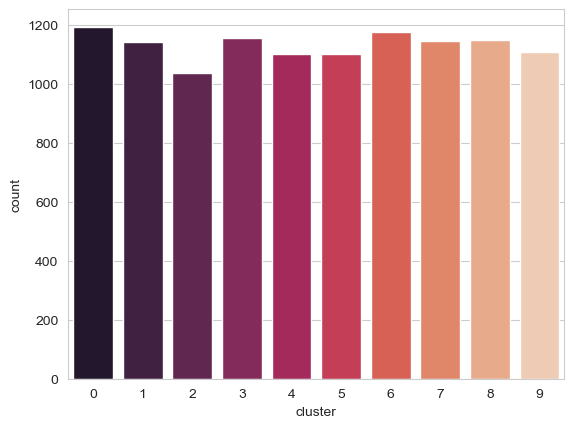

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='cluster', palette='rocket')
plt.show()

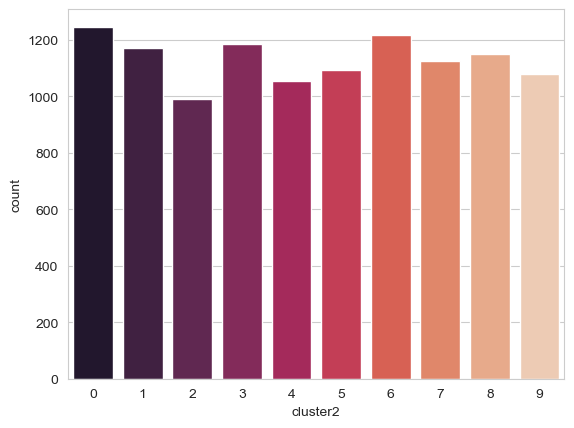

In [65]:
sns.countplot(data=df, x='cluster2', palette='rocket')
plt.show()

In [ ]:
#Model difference between kmeans and kmeans with PCA
#Identify the dimensions remained in PCA
